# LSFB ISOL Dataset

### Load the dataset

This example loads all the landmarks into the RAM. You can then fetch any instance at any instant.

In [1]:
from lsfb_dataset.datasets.lsfb_isol import LSFBIsolConfig, LSFBIsolLandmarks

lsfb_isol_root = 'E:/LSFB/LSFB_ISOL'

# Simple configuration that load all the landmarks (pose, hands)
simple_config = LSFBIsolConfig(
    root=lsfb_isol_root,
)

# More complex configuration that uses more options
complete_config = LSFBIsolConfig(
    root=lsfb_isol_root,
    landmarks=[             # Load these landmarks in this order (130 features)
        'hand_right',       # -- 21 landmarks (42 features)
        'hand_left',        # -- 21 landmarks (42 features)
        'pose',             # -- 23 landmarks (46 features)
    ],
    split='mini_sample',    # Only load a tiny subset of the dataset
    lemmes_nb=10,           # Number of lemmes (lexical signs) to use
    show_progress=True,     # Display the progress bar
)

# Dataset that loads all the landmarks in the RAM
dataset = LSFBIsolLandmarks(config=complete_config)
print(len(dataset))

# Fetch an instance
features, target = dataset[8]
features.shape, target

---------- LSFB ISOL DATASET
Loading features (hand_right, hand_left, pose) and labels for each isolated sign...


100%|██████████| 10/10 [00:00<00:00, 62.49it/s]

----------
loading time: 0:00:00.192997
10


((27, 130), 3)

### Lazy load the landmarks with a generator

Having all the landmarks in the RAM enables us to fetch them instantaneously without any major bottleneck.
It is useful in Deep Learning where the landmarks loading could slow down the training algorithm.
However, in some cases, you don't want to preload all the landmarks into the RAM.
Indeed, it takes a lot of RAM (around 5-6GB) and it's a heavy operation.
You can then use a generator that load landmarks on the fly.

In [2]:
from lsfb_dataset.datasets.lsfb_isol import LSFBIsolLandmarksGenerator

# Dataset that doesn't preload the landmarks
dataset = LSFBIsolLandmarksGenerator(config=complete_config)
print(len(dataset))

# Load an instance
features, target = dataset[8]
features.shape, target

10


((18, 130), 2)

### You can visualize your features

The library provides plotting functions for the datasets

OUI


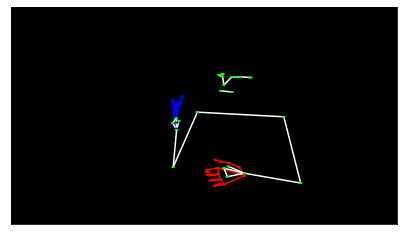

In [3]:
from lsfb_dataset.visualisation.landmarks import plot_landmarks

# Display the landmarks of the 400th frame of the instance
plot_landmarks(
    landmarks=features[15],
    landmark_types=complete_config.landmarks,
)
print(dataset.labels[target])